In [168]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
#%run -i 'functions.py'
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from pprint import pprint
from sklearn.metrics import confusion_matrix
import itertools

In [105]:
pd.set_option('display.max_columns', None)
master = pd.read_csv('final_data.csv')
master.head()

,Unnamed: 0,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,time,road_class,road_type,speed_limit,junction_control,crossguard,ped_crossway,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,road_hazard,urban_or_rural_area,did_police_officer_attend_scene_of_accident,coordinates,vehicle_type,trailer,vehicle_activity,in_restricted_lane,vehicle_action,vehicle_loc_post_impact,impact_type,was_vehicle_left_hand_drive?,journey_purpose_of_driver,sex_of_driver,age_driver,age_bin_driver,propulsion,age_of_vehicle,socioeconomic_status,driver_residence,car_status,season
0,0,minor,2,1,Monday,midnight,A_road,single_lane,20,yield,0,ped_light,1,clear,1,0,0,1,1,"(51.529746, -0.102474)",taxi,0,turn_left,0,none,on_road,front,1,work,1,40,7,hybrid/electric,6,low,city,poor,winter
1,1,severe,2,1,Monday,late_night,B_road,two_lane,30,traffic_light,0,ped_light,1,rain,0,0,0,1,1,"(51.530179, 0.037828)",car,0,turn_right,0,none,on_road,front,1,Unknown,1,27,6,petrol,1,middle,city,good,winter
2,2,severe,2,1,Monday,early_morning,C_road,single_lane,30,yield,0,none,1,clear,1,0,0,1,1,"(51.514545, -0.199239)",taxi,0,exiting,0,none,on_road,front,1,work,1,66,10,electric,5,low,city,poor,winter
3,3,minor,3,1,Monday,early_morning,A_road,one_way,30,yield,0,none,1,clear,1,0,0,1,1,"(51.475091, -0.032886)",taxi,0,driving,0,none,on_road,back,1,work,2,36,7,hybrid/electric,2,low,city,poor,winter
4,4,minor,2,1,Monday,midnight,Unclassified,single_lane,30,yield,0,cross_walk,1,clear,1,0,0,1,1,"(51.56325, -0.311872)",car,0,turn_right,0,none,on_road,front,1,Unknown,1,24,5,petrol,9,low,city,okay,winter


In [106]:
master.drop(['Unnamed: 0'],axis=1 , inplace=True)

In [107]:
master

,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,time,road_class,road_type,speed_limit,junction_control,crossguard,ped_crossway,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,road_hazard,urban_or_rural_area,did_police_officer_attend_scene_of_accident,coordinates,vehicle_type,trailer,vehicle_activity,in_restricted_lane,vehicle_action,vehicle_loc_post_impact,impact_type,was_vehicle_left_hand_drive?,journey_purpose_of_driver,sex_of_driver,age_driver,age_bin_driver,propulsion,age_of_vehicle,socioeconomic_status,driver_residence,car_status,season
0,minor,2,1,Monday,midnight,A_road,single_lane,20,yield,0,ped_light,1,clear,1,0,0,1,1,"(51.529746, -0.102474)",taxi,0,turn_left,0,none,on_road,front,1,work,1,40,7,hybrid/electric,6,low,city,poor,winter
1,severe,2,1,Monday,late_night,B_road,two_lane,30,traffic_light,0,ped_light,1,rain,0,0,0,1,1,"(51.530179, 0.037828)",car,0,turn_right,0,none,on_road,front,1,Unknown,1,27,6,petrol,1,middle,city,good,winter
2,severe,2,1,Monday,early_morning,C_road,single_lane,30,yield,0,none,1,clear,1,0,0,1,1,"(51.514545, -0.199239)",taxi,0,exiting,0,none,on_road,front,1,work,1,66,10,electric,5,low,city,poor,winter
3,minor,3,1,Monday,early_morning,A_road,one_way,30,yield,0,none,1,clear,1,0,0,1,1,"(51.475091, -0.032886)",taxi,0,driving,0,none,on_road,back,1,work,2,36,7,hybrid/electric,2,low,city,poor,winter
4,minor,2,1,Monday,midnight,Unclassified,single_lane,30,yield,0,cross_walk,1,clear,1,0,0,1,1,"(51.56325, -0.311872)",car,0,turn_right,0,none,on_road,front,1,Unknown,1,24,5,petrol,9,low,city,okay,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67561,severe,3,4,Saturday,rush_hour_pm,A_road,single_lane,50,yield,0,none,1,clear,1,0,0,2,1,"(52.676513, -3.096952)",car,0,driving,0,none,side,passenger,1,Unknown,1,57,9,electric,12,low,city,poor,fall
67562,minor,4,3,Sunday,rush_hour_am,A_road,single_lane,50,yield,0,none,0,clear,1,0,0,2,1,"(52.586426, -3.190648)",car,0,driving,0,none,side,back,1,Unknown,1,30,6,petrol,11,low,city,poor,fall
67563,minor,2,1,Sunday,afternoon,A_road,single_lane,60,yield,0,none,0,clear,1,0,0,2,1,"(52.29757, -3.2331830000000004)",car,0,driving,0,skidded,on_road,front,1,Unknown,1,49,8,electric,5,low,city,poor,fall
67564,minor,1,1,Wednesday,midnight,A_road,single_lane,60,yield,0,none,1,clear,0,0,0,2,1,"(51.951469, -3.52736)",car,0,driving,0,overturned,side,front,1,Unknown,1,37,7,petrol,6,low,city,okay,fall


In [108]:
pd.factorize(master['accident_severity'])[0]+1

array([1, 2, 2, ..., 1, 1, 1])

In [110]:
master['accident_severity'] = pd.factorize(master['accident_severity'])[0]+1
master['day_of_week'] = pd.factorize(master['day_of_week'])[0]+1
master['time'] = pd.factorize(master['time'])[0]+1
master['road_class'] = pd.factorize(master['road_class'])[0]+1
master['junction_control'] = pd.factorize(master['junction_control'])[0]+1
master['ped_crossway'] = pd.factorize(master['ped_crossway'])[0]+1
master['weather_conditions'] = pd.factorize(master['weather_conditions'])[0]+1
master['vehicle_type'] = pd.factorize(master['vehicle_type'])[0]+1
master['vehicle_activity'] = pd.factorize(master['accident_severity'])[0]+1
master['vehicle_action'] = pd.factorize(master['vehicle_action'])[0]+1
master['vehicle_loc_post_impact'] = pd.factorize(master['accident_severity'])[0]+1
master['impact_type'] = pd.factorize(master['impact_type'])[0]+1
master['journey_purpose_of_driver'] = pd.factorize(master['journey_purpose_of_driver'])[0]+1
master['propulsion'] = pd.factorize(master['propulsion'])[0]+1
master['socioeconomic_status'] = pd.factorize(master['socioeconomic_status'])[0]+1
master['driver_residence'] = pd.factorize(master['driver_residence'])[0]+1
master['car_status'] = pd.factorize(master['car_status'])[0]+1
master['season'] = pd.factorize(master['season'])[0]+1
master['road_type'] = pd.factorize(master['road_type'])[0]+1

In [111]:
master.head()

,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,time,road_class,road_type,speed_limit,junction_control,crossguard,ped_crossway,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,road_hazard,urban_or_rural_area,did_police_officer_attend_scene_of_accident,coordinates,vehicle_type,trailer,vehicle_activity,in_restricted_lane,vehicle_action,vehicle_loc_post_impact,impact_type,was_vehicle_left_hand_drive?,journey_purpose_of_driver,sex_of_driver,age_driver,age_bin_driver,propulsion,age_of_vehicle,socioeconomic_status,driver_residence,car_status,season
0,1,2,1,1,1,1,1,20,1,0,1,1,1,1,0,0,1,1,"(51.529746, -0.102474)",1,0,1,0,1,1,1,1,1,1,40,7,1,6,1,1,1,1
1,2,2,1,1,2,2,2,30,2,0,1,1,2,0,0,0,1,1,"(51.530179, 0.037828)",2,0,2,0,1,2,1,1,2,1,27,6,2,1,2,1,2,1
2,2,2,1,1,3,3,1,30,1,0,2,1,1,1,0,0,1,1,"(51.514545, -0.199239)",1,0,2,0,1,2,1,1,1,1,66,10,3,5,1,1,1,1
3,1,3,1,1,3,1,3,30,1,0,2,1,1,1,0,0,1,1,"(51.475091, -0.032886)",1,0,1,0,1,1,2,1,1,2,36,7,1,2,1,1,1,1
4,1,2,1,1,1,4,1,30,1,0,3,1,1,1,0,0,1,1,"(51.56325, -0.311872)",2,0,1,0,1,1,1,1,2,1,24,5,2,9,1,1,3,1


In [120]:
#master.drop(['coordinates', 'age_bin_driver'],axis=1 , inplace=True)

In [121]:
df

,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,time,road_class,road_type,speed_limit,junction_control,crossguard,ped_crossway,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,road_hazard,urban_or_rural_area,did_police_officer_attend_scene_of_accident,vehicle_type,trailer,vehicle_activity,in_restricted_lane,vehicle_action,vehicle_loc_post_impact,impact_type,was_vehicle_left_hand_drive?,journey_purpose_of_driver,sex_of_driver,age_driver,propulsion,age_of_vehicle,socioeconomic_status,driver_residence,car_status,season
0,1,2,1,1,1,1,1,20,1,0,1,1,1,1,0,0,1,1,1,0,1,0,1,1,1,1,1,1,40,1,6,1,1,1,1
1,2,2,1,1,2,2,2,30,2,0,1,1,2,0,0,0,1,1,2,0,2,0,1,2,1,1,2,1,27,2,1,2,1,2,1
2,2,2,1,1,3,3,1,30,1,0,2,1,1,1,0,0,1,1,1,0,2,0,1,2,1,1,1,1,66,3,5,1,1,1,1
3,1,3,1,1,3,1,3,30,1,0,2,1,1,1,0,0,1,1,1,0,1,0,1,1,2,1,1,2,36,1,2,1,1,1,1
4,1,2,1,1,1,4,1,30,1,0,3,1,1,1,0,0,1,1,2,0,1,0,1,1,1,1,2,1,24,2,9,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67561,2,3,4,6,7,1,1,50,1,0,2,1,1,1,0,0,2,1,2,0,2,0,1,2,3,1,2,1,57,3,12,1,1,1,4
67562,1,4,3,7,9,1,1,50,1,0,2,0,1,1,0,0,2,1,2,0,1,0,1,1,2,1,2,1,30,2,11,1,1,1,4
67563,1,2,1,7,6,1,1,60,1,0,2,0,1,1,0,0,2,1,2,0,1,0,2,1,1,1,2,1,49,3,5,1,1,1,4
67564,1,1,1,3,1,1,1,60,1,0,2,1,1,0,0,0,2,1,2,0,1,0,3,1,1,1,2,1,37,2,6,1,1,3,4


In [249]:
df['accident_severity'].replace(3.0, ' ', inplace = True)
df['accident_severity'].replace(1.0, 0, inplace = True)
df['accident_severity'].replace(2.0,1, inplace = True)


In [250]:
df['accident_severity'].replace(' ', np.nan, inplace = True)

In [251]:
df['accident_severity'].dropna(inplace = True)

In [252]:
df['accident_severity'].value_counts()

0.0    54886
1.0    12060
Name: accident_severity, dtype: int64

In [149]:
54886+12060

66946

In [150]:
df.shape

(67566, 35)

In [253]:
df=df.dropna()

In [270]:
df.shape

(66946, 35)

In [223]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [291]:
X = df.drop(columns=['accident_severity'], axis=1)
y = df['accident_severity']

Logistic Regression 

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.2)


In [293]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [294]:
y_test.value_counts()

0.0    10971
1.0     2419
Name: accident_severity, dtype: int64

In [295]:
y_test.mean()

0.18065720687079911

In [296]:
y_pred = logreg.predict(X_test)

In [297]:
print(metrics.confusion_matrix(y_test, y_pred))

[[10971     0]
 [    0  2419]]


In [298]:
y_pred = logreg.predict(X_test)
y_pred_series = pd.Series(y_pred)
y_pred_series.value_counts()

0.0    10971
1.0     2419
dtype: int64

In [299]:
max(y_test.mean(), 1 - y_test.mean())

0.8193427931292009

In [300]:
print('True:', y_test.values[0:25])
print('Pred:', y_pred[0:25])

True: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0.]
Pred: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0.]


In [301]:
accuracy_score(y_test, y_pred)

1.0

In [302]:
cm = confusion_matrix(y_test,y_pred)
classes = ['Slight', 'Serious']


Confusion Matrix, without normalization
[[10971     0]
 [    0  2419]]


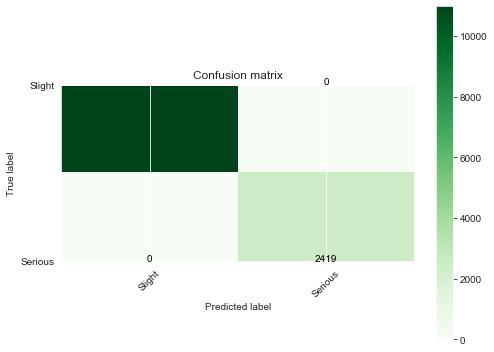

In [303]:
import itertools
fig = plt.figure(figsize = (7,5))
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                      cmap=plt.cm.Greens)

In [304]:
y_pred_class = logreg.predict(X_test)

In [305]:
print(metrics.accuracy_score(y_test, y_pred))

1.0
